# Convolutional Network Model

## Train for 5 epochs

Observe the loss decreasing while training.

In [9]:
%%capture
!python ConvolutionalNetwork.py --max_epochs=5

## Inspect logs
⚠️ Make sure to **Stop** the cell execution after observing the logs

After only **5 epochs**, the model achieves **98.5% accuracy** on the MNIST test data set.

It performs better than the previous neural network model.

In [5]:
!tensorboard --logdir=./lightning_logs

^C


## Load trained model
Checkpoints are saved incrementally for each training session under `./lightning_logs/version_X`.

In [6]:
__import__("sys").path.append("..")
import utils
from ConvolutionalNetwork import ConvolutionalNetwork

model = utils.load_trained_model_for_evaluation(ConvolutionalNetwork, 3)
print(model)

ConvolutionalNetwork(
  (seq): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=800, out_features=10, bias=True)
    (8): LogSoftmax(dim=1)
  )
)


## Predict MNIST labels

Original label:  8 Predicted label:  8


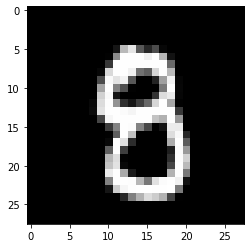

Original label:  3 Predicted label:  3


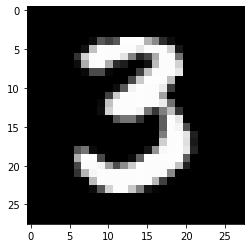

Original label:  4 Predicted label:  4


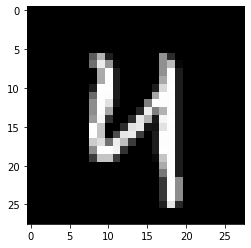

Original label:  6 Predicted label:  6


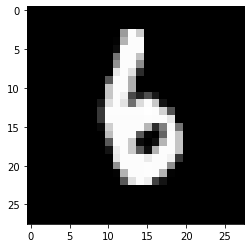

Original label:  3 Predicted label:  3


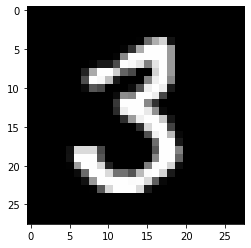

Original label:  9 Predicted label:  9


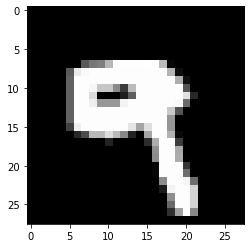

Original label:  8 Predicted label:  8


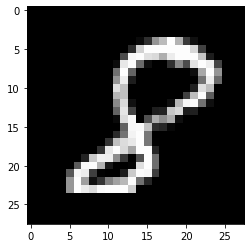

Original label:  2 Predicted label:  2


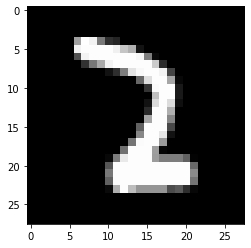

Original label:  1 Predicted label:  1


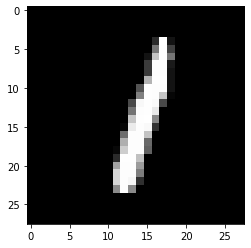

Original label:  3 Predicted label:  3


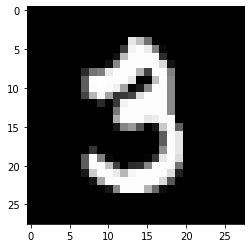

In [7]:
import torch
import random

test_len = model.mnist_test.data.shape[0]

for i in range(0, 10):
    orig_img, orig_label = model.mnist_test[random.randint(0, test_len)]
    orig_img = orig_img.view(1, 1, 28, 28)
    classes = model(orig_img)
    predicted_label = torch.max(classes.data, 1).indices.item()

    print("Original label: ", orig_label, "Predicted label: ", predicted_label)
    utils.plot_images([orig_img.view(28, 28)])